The full dataset comprises 1503 spectra of diterpenes, classified into 23 different classes according to their skeleton structure.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [5]:
file_path = 'data/diterpene_shuf.csv'
data = pd.read_csv(file_path)

In [6]:
print("Dataset Shape:", data.shape)
print("\nColumn Names:", data.columns)
print("\nFirst 5 Rows:")
print(data.head())

Dataset Shape: (1202, 46)

Column Names: Index(['a0', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9', 'a10',
       'a11', 'a12', 'a13', 'a14', 'a15', 'a16', 'a17', 'a18', 'a19', 'a20',
       'a21', 'a22', 'a23', 'a24', 'a25', 'a26', 'a27', 'a28', 'a29', 'a30',
       'a31', 'a32', 'a33', 'a34', 'a35', 'a36', 'a37', 'a38', 'a39', 'a40',
       'a41', 'a42', 'a43', 'a44', 'a45c'],
      dtype='object')

First 5 Rows:
   a0  a1  a2  a3     a4 a5     a6 a7     a8 a9  ...    a36 a37   a38 a39  \
0   2   4   8   6  v1493  t  139.2  q   33.2  d  ...  134.5   t  24.2   q   
1   2   4   8   6  v1255  d  144.0  q   66.7  d  ...   22.4   s  37.7   q   
2   2   4   8   6  v2194  d   30.7  t   26.8  t  ...   16.7   t  35.4   q   
3   3   4   9   4  v2021  t   37.2  t   17.4  q  ...   33.5   d  44.9   d   
4   3   4   9   4  v1051  q   12.2  d  154.6  t  ...   49.5   t  38.8   t   

    a40 a41   a42 a43    a44 a45c  
0  14.4   t  42.2   t   18.6  52c  
1  19.7   q  16.5   t   26.6  54c  
2 

The dataset has 1202 instances (rows) and 46 variables (columns). The first 45 columns are named ax, x being a number from 0 to 45, and the last column is named a45c.

In [7]:
print("\nData Types for Each Column:")
print(data.dtypes)

print("\nSummary of Value Types:")
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Column: {column}")
    print(f"  - Data Type: {data[column].dtype}")
    print(f"  - Number of Unique Values: {len(unique_values)}")
    print(f"  - Example Values: {unique_values[:5]}")
    print("-" * 40)


Data Types for Each Column:
a0        int64
a1        int64
a2        int64
a3        int64
a4       object
a5       object
a6      float64
a7       object
a8      float64
a9       object
a10     float64
a11      object
a12     float64
a13      object
a14     float64
a15      object
a16     float64
a17      object
a18     float64
a19      object
a20     float64
a21      object
a22     float64
a23      object
a24     float64
a25      object
a26     float64
a27      object
a28     float64
a29      object
a30     float64
a31      object
a32     float64
a33      object
a34     float64
a35      object
a36     float64
a37      object
a38     float64
a39      object
a40     float64
a41      object
a42     float64
a43      object
a44     float64
a45c     object
dtype: object

Summary of Value Types:
Column: a0
  - Data Type: int64
  - Number of Unique Values: 4
  - Example Values: [2 3 4 1]
----------------------------------------
Column: a1
  - Data Type: int64
  - Number of Unique Values: 6

Looking at each column, these are the patterns that I found:
- first 4 columns are of type integer, having 4, 6, 8, 8 unique values respectively (=> categorical variables)
- column a4 (5th column) is of type "object", has 1202 unique values, example values: 'v1493', 'v1255'
- starting from the 6th column, every other column is of type char, with the following unique values: ['t' 'd' 'q' 's'] (=> categorical variables)
- starting from the 7th column, every other column is of type float64 with similar ranges (=> numerical variable)
- the last column (a45c) is of type "object", has 22 unique values, example values: '52c', '54c', '3c' (=> categorical variable) - output?

In [8]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
a0      0
a1      0
a2      0
a3      0
a4      0
a5      0
a6      0
a7      0
a8      0
a9      0
a10     0
a11     0
a12     0
a13     0
a14     0
a15     0
a16     0
a17     0
a18     0
a19     0
a20     0
a21     0
a22     0
a23     0
a24     0
a25     0
a26     0
a27     0
a28     0
a29     0
a30     0
a31     0
a32     0
a33     0
a34     0
a35     0
a36     0
a37     0
a38     0
a39     0
a40     0
a41     0
a42     0
a43     0
a44     0
a45c    0
dtype: int64


There are no missing values.

In [9]:
categorical_columns = ['a0', 'a1', 'a2', 'a3']  # First 4 categorical columns
categorical_columns += [col for col in data.columns[5:] if data[col].dtype == 'object']  # Alternating 'char' columns and 'a45c'
numerical_columns = [col for col in data.columns[6:] if data[col].dtype == 'float64']  # Alternating float64 columns


In [10]:
# Encode categorical variables
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))  # Convert to string for compatibility
    label_encoders[col] = le

In [11]:
# Scale numerical variables
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])


In [12]:
print("\nPreprocessed Data Head:")
display(data.head())


Preprocessed Data Head:


,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,...,a36,a37,a38,a39,a40,a41,a42,a43,a44,a45c
0,1,2,6,5,v1493,3,1.888536,1,-0.565165,0,...,1.592846,3,-0.745489,1,-0.958941,3,-0.376196,3,-0.869335,13
1,1,2,6,5,v1255,0,1.997999,1,0.164497,0,...,-0.824280,2,-0.455034,1,-0.840436,1,-0.912392,3,-0.691076,14
2,1,2,6,5,v2194,0,-0.585792,3,-0.704563,3,...,-0.947184,3,-0.504519,1,0.190339,2,-0.372023,0,1.831293,14
3,2,2,7,3,v2021,3,-0.437560,3,-0.909304,1,...,-0.584939,0,-0.300124,0,-0.015368,1,-0.822678,3,-0.470480,9
4,2,2,7,3,v1051,1,-1.007682,0,2.079042,3,...,-0.239943,3,-0.431367,3,0.315553,2,-0.488859,2,-0.254340,9


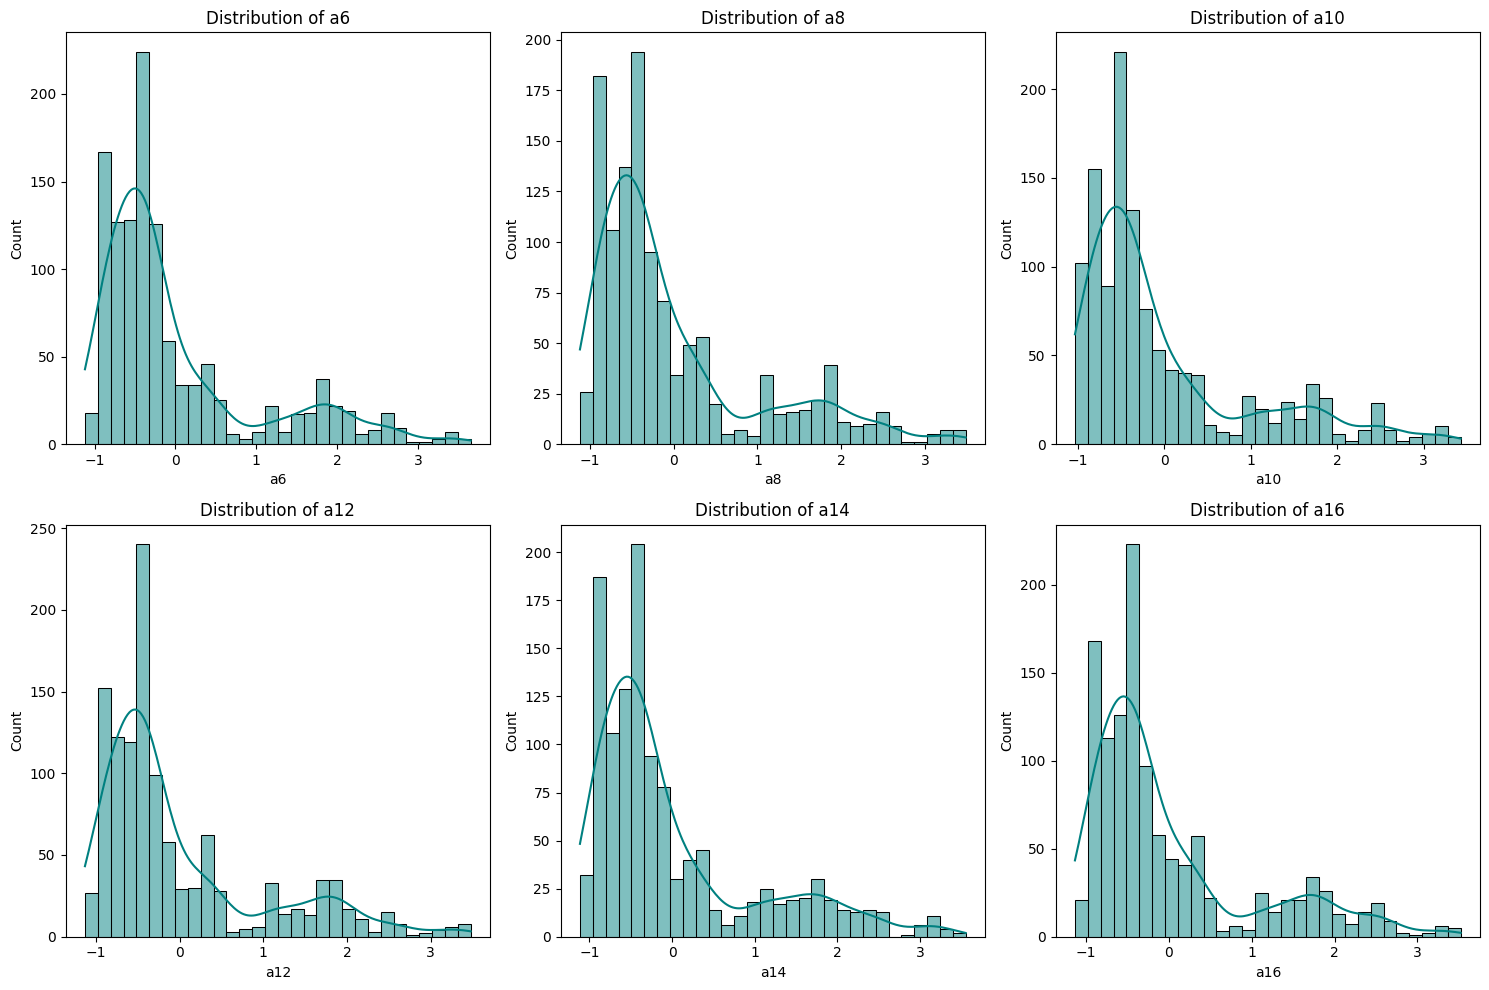

In [13]:
# 1. Distribution of Numerical Variables
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns[:6], 1):  # Plot first 6 numerical columns
    plt.subplot(2, 3, i)
    sns.histplot(data[col], kde=True, color='teal', bins=30)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


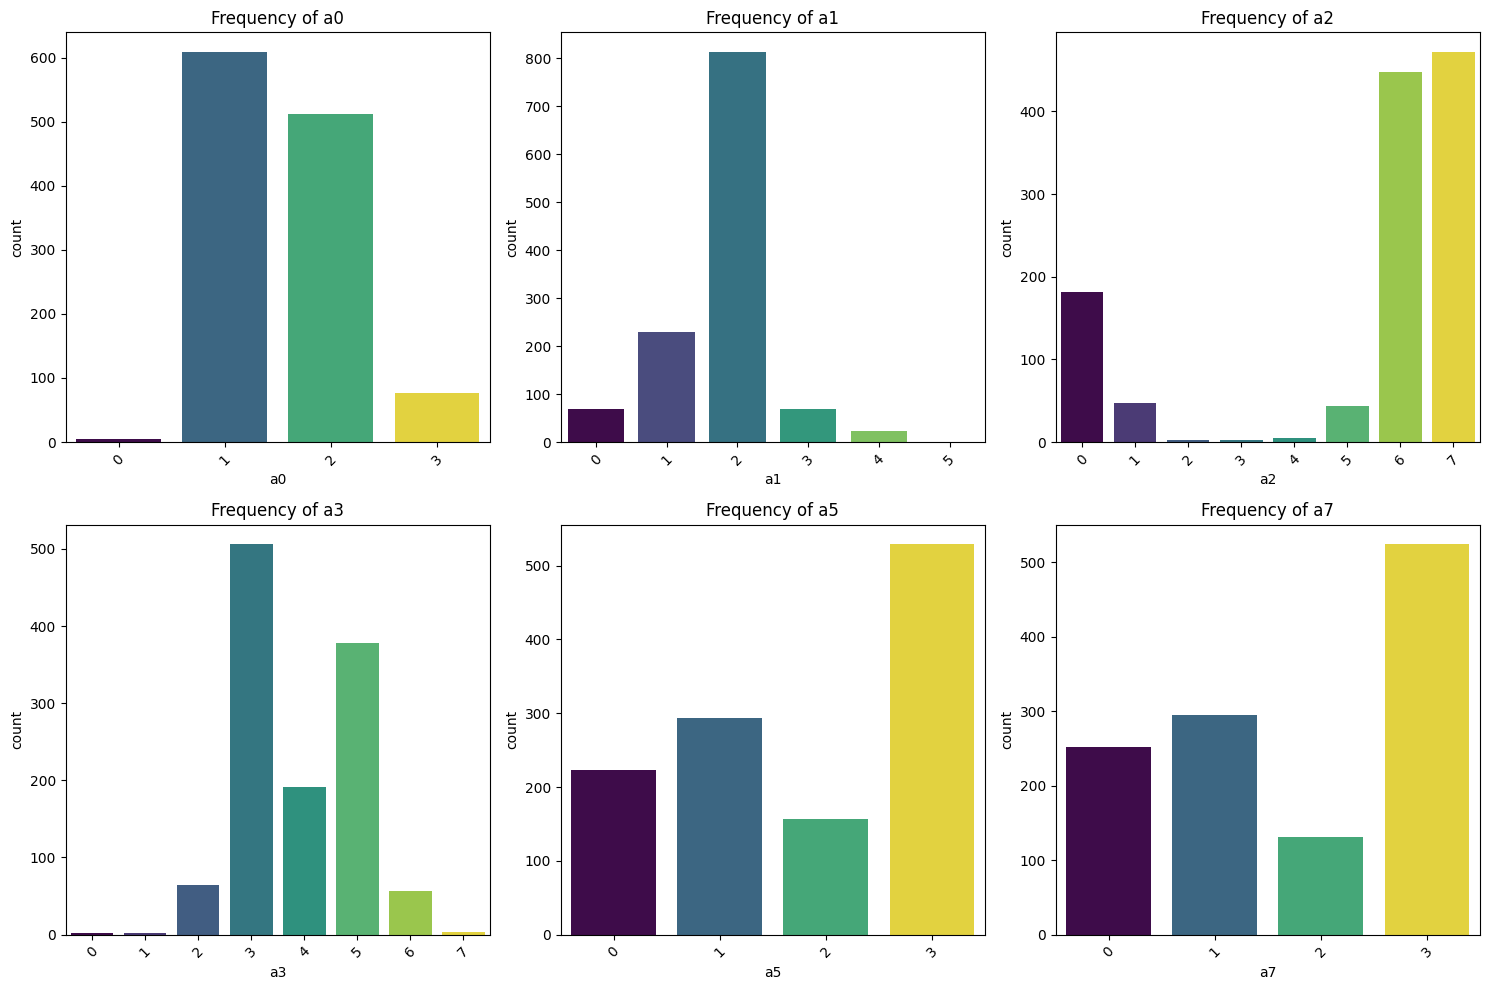

In [19]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_columns[:6], 1):  # Plot first 6 categorical columns
    plt.subplot(2, 3, i)
    sns.countplot(data=data, x=col, hue=col, palette='viridis', legend=False)
    plt.title(f"Frequency of {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


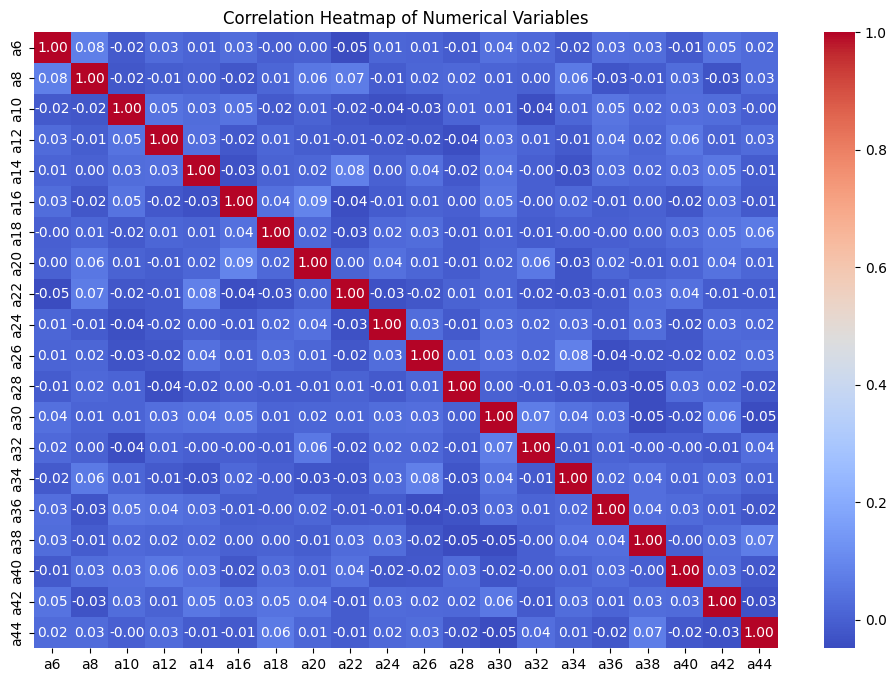

In [15]:
# 3. Correlation Heatmap for Numerical Variables
plt.figure(figsize=(12, 8))
sns.heatmap(data[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()

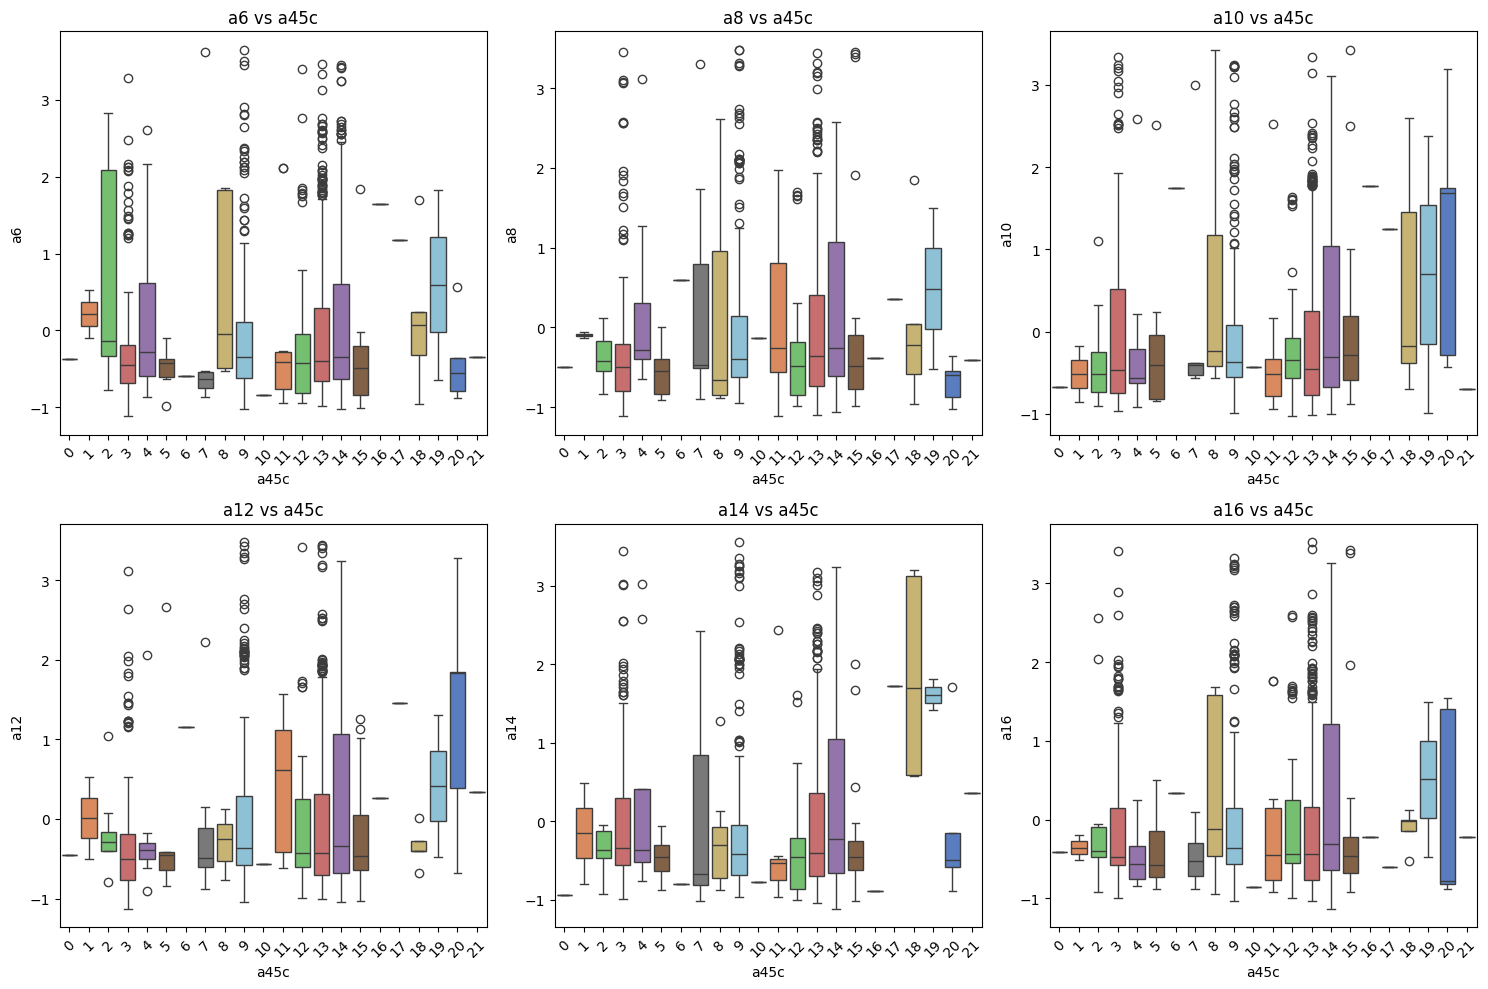

In [18]:
# 4. Relationship Between Numerical Features and Output (a45c)
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns[:6], 1):  # First 6 numerical columns
    plt.subplot(2, 3, i)
    sns.boxplot(data=data, x='a45c', hue='a45c', y=col, palette='muted', legend=False)
    plt.title(f"{col} vs a45c")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/6s/_kyddfjd0ysdf2vbk1rhsx9c0000gn/T/ipykernel_57647/2184489786.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='a45c', palette='viridis')


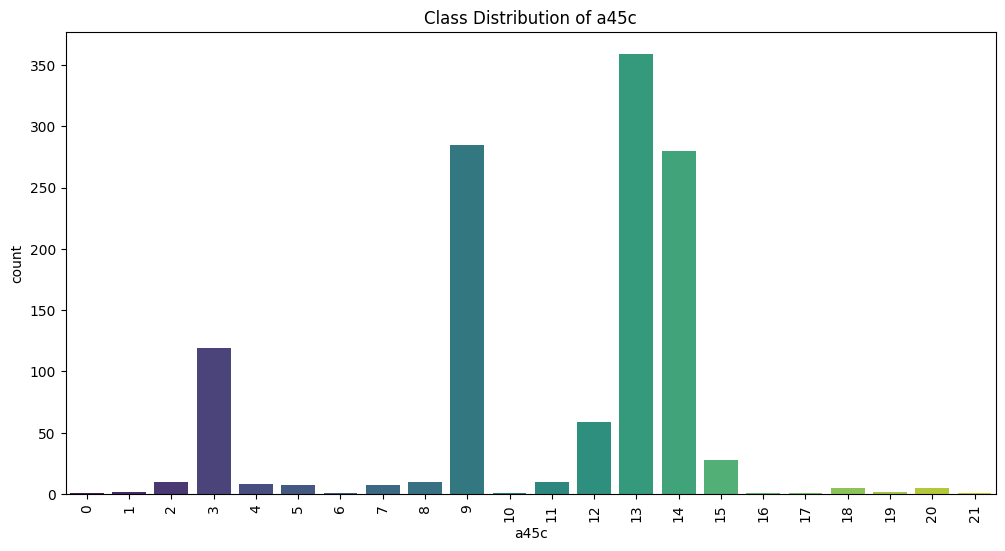

In [17]:
# 5. Class Distribution of the Output Variable (a45c)
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='a45c', palette='viridis')
plt.title('Class Distribution of a45c')
plt.xticks(rotation=90)
plt.show()